In [1]:
%matplotlib inline
import numpy as np
import libMStruct as mst
import matplotlib.pyplot as plt

In [2]:
filename = "data/HexaFerit01.xml"
crystal_name = "Strontium Dodecairon(III) Oxide"
cryst = mst.CreateCrystalFromXML(filename, crystal_name)

instrProf = mst.PseudoVoigtBroadeningEffect()

scattData = mst.PowderPatternDiffraction()
scattData.SetCrystal(cryst)

pattern = mst.PowderPattern()
pattern.SetWavelength("CuA1")

pattern.AddComponent(scattData)

#profile = mst.ReflectionProfile(cryst, pattern.GetRadiation())
rad = mst.Radiation("CuA1", 0.)
profile = mst.ReflectionProfile(cryst, rad)
profile.SetParentPowderPatternDiffraction(scattData)
scattData.SetProfile(profile) # this can be done in SetParentPowderPatternDiffraction ???

instrProf.SetParentProfile(profile)

pattern.SetPar(10.*np.pi/180., 0.01*np.pi/180., int((150.-10.)/0.01)+1)
pattern.SetObsToZero()
pattern.SetWeightToUnit()

XML: Loading Crystal:
XML: Loading Crystal:Strontium Dodecairon(III) Oxide(spg:P 63/m m c)
Input ScatteringPowerAtom:Sr(Sr2+)
Could not find colour:Sr for ScatteringPower Sr
Input ScatteringPowerAtom:Fe(Fe3+)
Could not find colour:Fe for ScatteringPower Fe
Input ScatteringPowerAtom:O(O2-)
Could not find colour:O for ScatteringPower O
XML: Loading Atom:Sr1
XML: Loading Atom:Fe1
XML: Loading Atom:Fe2
XML: Loading Atom:Fe3
XML: Loading Atom:Fe4
XML: Loading Atom:Fe5
XML: Loading Atom:O1
XML: Loading Atom:O2
XML: Loading Atom:O3
XML: Loading Atom:O4
XML: Loading Atom:O5
Changed powder pattern: 14001 points, 2theta= 10.000 -> 150.000, step= 0.010


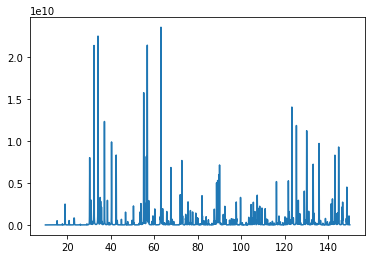

In [3]:
pattern.Prepare()
ycalc = pattern.GetCalc()

# this should be replaced once we have np.array in/out
tth = pattern.GetPowderPatternX()
plt.plot(180.0/np.pi *tth, ycalc);